In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import warnings
import os
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [17]:
df = pd.read_csv("../preprocessed_data/preprocessed_train.csv")

# PCA

In [18]:
def plot_variance_content(df):
    pca = PCA()
    pca.fit(df)
    variance_ratio = pca.explained_variance_ratio_
    x = np.arange(len(variance_ratio))

    plt.bar(x, variance_ratio)
    plt.xlabel('Kolumny')
    plt.ylabel('Zawarta wariancja')
    plt.xticks(x)
    plt.show()

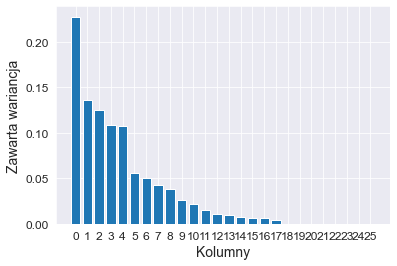

In [19]:
plot_variance_content(df)

In [20]:
def plot_explained_variance(data, variance_ratio_threshold=0.95, max_columns=15):

    pca = PCA()
    pca.fit(data)

    variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_ratio)
    x = np.arange(1, len(variance_ratio) + 1)

    if max_columns:
        cumulative_variance = cumulative_variance[:max_columns]
        x = x[:max_columns]

    plt.plot(x, cumulative_variance, marker='o', linestyle='-', color='b')
    plt.xlabel('Liczba kolumn')
    plt.ylabel('Skumulowana wariancja wyjaśniona')
    plt.grid(True)

    if variance_ratio_threshold:
        plt.axhline(y=variance_ratio_threshold, color='r', linestyle='--')
        intersection_idx = np.argmax(cumulative_variance >= variance_ratio_threshold)
        plt.axvline(x=intersection_idx+1, color='black', linestyle='--')

    plt.show()


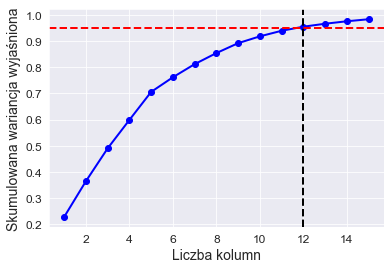

In [21]:
plot_explained_variance(df, 0.95)

In [22]:
pca = PCA(n_components = 12)
df_pca_processed = pd.DataFrame(pca.fit_transform(df))

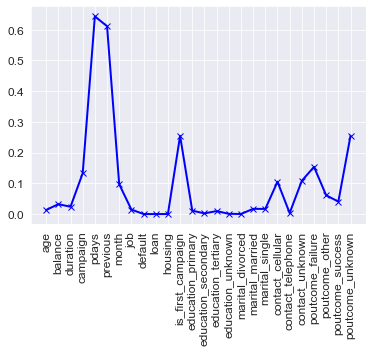

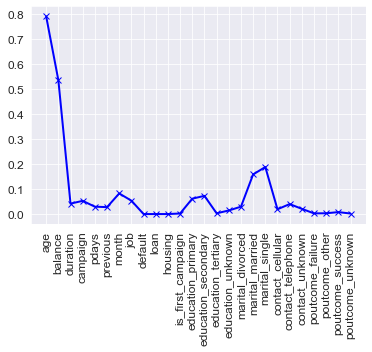

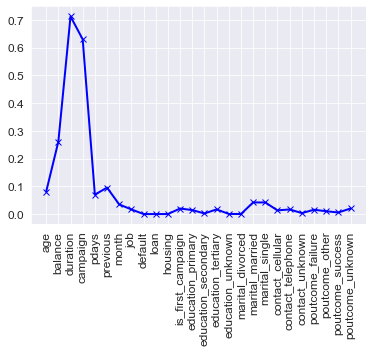

In [25]:
plt.plot(df.columns, abs(pca.components_)[0], 'bx-')
plt.xticks(rotation = 90)
plt.show()

plt.plot(df.columns, abs(pca.components_)[1], 'bx-')
plt.xticks(rotation = 90)
plt.show()

plt.plot(df.columns, abs(pca.components_)[2], 'bx-')
plt.xticks(rotation = 90)
plt.show()